Query: Quantum mechanics
Precision@10: 1.0
Recall@10: 0.167
------------------------------
Query: 19th century novels
Precision@10: 1.0
Recall@10: 0.167
------------------------------
Query: Machine learning
Precision@10: 1.0
Recall@10: 0.083
------------------------------


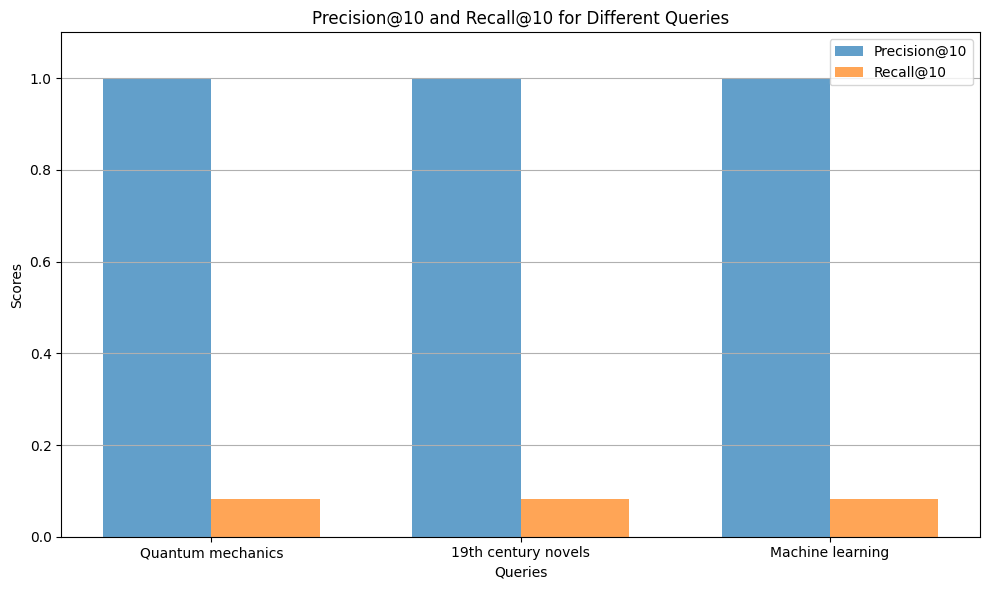

In [10]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt
import random

#Sample dataset: documents and queries with ground truth relevant documents
# documents = [
#     "Quantum mechanics is a fundamental theory in physics.",
#     "19th century novels often explore social issues.",
#     "Machine learning is a subset of artificial intelligence.",
#     "Quantum entanglement is a phenomenon in quantum physics.",
#     "Classic literature includes many 19th century novels.",
#     "Deep learning is a part of machine learning.",
#     "Physics explores the nature of the universe.",
#     "Artificial intelligence is transforming technology.",
#     "Novels from the 19th century reflect historical contexts.",
#     "Neural networks are used in machine learning."
# ]
documents = [
    "Quantum mechanics is a fundamental theory in physics." if i % 5 == 0 else
    "19th century novels often explore social issues." if i % 5 == 1 else
    "Machine learning is a subset of artificial intelligence." if i % 5 == 2 else
    "Artificial intelligence is transforming technology." if i % 5 == 3 else
    "Deep learning is a part of machine learning." for i in range(300)
]

queries = [
    "Quantum mechanics",
    "19th century novels",
    "Machine learning"
]

# Ground truth relevant document indices for each query
relevant_docs = [
    [i for i in range(300) if i % 5 == 0],  # Quantum mechanics related docs
    [i for i in range(300) if i % 5 == 1],  # 19th century novels related docs
    [i for i in range(300) if i % 5 == 2 or i % 5 == 3]   # Machine learning and AI related docs
]

# Load embedding model
model_name = "sentence-transformers/all-MiniLM-L6-v2"
model = SentenceTransformer(model_name)

# Compute embeddings for documents
doc_embeddings = model.encode(documents, convert_to_numpy=True)

def similarity_search(query, doc_embeddings, top_k=10):
    query_embedding = model.encode([query], convert_to_numpy=True)
    similarities = cosine_similarity(query_embedding, doc_embeddings)[0]
    top_indices = np.argsort(similarities)[::-1][:top_k]
    return top_indices, similarities[top_indices]

def evaluate_metrics(query, relevant_indices, doc_embeddings, k=10):
    retrieved_indices, _ = similarity_search(query, doc_embeddings, top_k=k)
    retrieved_set = set(retrieved_indices)
    relevant_set = set(relevant_indices)
    true_positives = len(retrieved_set.intersection(relevant_set))
    precision = true_positives / k
    recall = true_positives / len(relevant_set)
    return precision, recall

# Run evaluation for each query
results = []
for i, query in enumerate(queries):
    precision, recall = evaluate_metrics(query, relevant_docs[i], doc_embeddings, k=10)
    results.append({
        "query": query,
        "precision@10": round(precision, 3),
        "recall@10": round(recall, 3)
    })

# Print results
for res in results:
    print(f"Query: {res['query']}")
    print(f"Precision@10: {res['precision@10']}")
    print(f"Recall@10: {res['recall@10']}")
    print("-" * 30)




# Plotting the bar chart for Precision@10 and Recall@10
x = range(len(queries))
width = 0.35  # Width of the bars

plt.figure(figsize=(10, 6))
plt.bar(x, precision, width=width, label='Precision@10', align='center', alpha=0.7)
plt.bar([i + width for i in x], recall, width=width, label='Recall@10', align='center', alpha=0.7)

plt.xticks([i + width/2 for i in x], queries)  # Center the x-axis labels
plt.xlabel('Queries')
plt.ylabel('Scores')
plt.title('Precision@10 and Recall@10 for Different Queries')
plt.legend()
plt.ylim(0, 1.1)  # Set y-axis limit to 0-1.1 for better visualization
plt.grid(axis='y')
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


## Precision and Recall Explained

Precision and recall are two essential metrics used to evaluate the performance of information retrieval systems, such as document search or recommendation engines. They provide insights into the accuracy and completeness of the results returned by a query.

### Precision

Precision measures the accuracy of the results by calculating the ratio of correctly retrieved relevant documents to the total number of documents retrieved. In other words, it tells you how much of what the system returned was actually relevant.

**Formula:**
`Precision = (Number of Relevant Documents Retrieved) / (Total Number of Documents Retrieved`
For example, if a search query returns 10 documents and 7 of them are relevant, the precision is 7/10 = 0.7 or 70%.

### Recall

Recall measures the completeness of the results by calculating the ratio of correctly retrieved relevant documents to the total number of relevant documents in the entire corpus (dataset). It indicates how much of the total relevant content the system was able to find.

**Formula:**
`Recall = (Number of Relevant Documents Retrieved) / (Total Number of Relevant Documents in Corpus)`

For example, if there are 15 relevant documents in the entire dataset for a specific query, and the system retrieves 6 of them, the recall is 6/15 = 0.4 or 40%.

### Precision@K and Recall@K

Precision@K and Recall@K are variations of these metrics, specifically focusing on the top K results retrieved by the system.  This is particularly useful when evaluating systems that are expected to return a ranked list of results, where the order matters.

*   **Precision@K:**  Considers only the top K documents retrieved and calculates the precision based on those K documents.

*   **Recall@K:** Considers only the top K documents retrieved, but calculates recall against all relevant documents in the corpus.

### Interpreting the Graph

The bar chart visualizes Precision@10 and Recall@10 for different queries.

*   Each query ("Quantum mechanics", "19th century novels", "Machine learning") has two bars: one for Precision@10 and one for Recall@10.

*   The height of the "Precision@10" bar indicates the proportion of the top 10 documents retrieved that were actually relevant to the query. A higher bar indicates better accuracy.

*   The height of the "Recall@10" bar indicates the proportion of all relevant documents in the dataset that were retrieved within the top 10 results. A higher bar indicates better completeness.

By comparing the precision and recall scores for different queries, we can assess the performance of the information retrieval system across various topics. High precision and recall scores generally indicate better performance. However, there's often a trade-off between precision and recall.  Improving one may come at the cost of the other, depending on the system and the specific data.
